<a href="https://colab.research.google.com/github/BitUpTeam/BitUp/blob/Nikita/BitUp_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

from google.colab import files

In [ ]:
files.upload()

In [3]:
df = pd.read_csv('BTC-USD-DAY-17.09.2014-06.03.2023.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3088,2023-03-02,23647.019531,23739.138672,23245.021484,23475.466797,23475.466797,20386398516
3089,2023-03-03,23476.632813,23479.347656,22213.238281,22362.679688,22362.679688,26062404610
3090,2023-03-04,22362.923828,22405.177734,22198.980469,22353.349609,22353.349609,11166012913
3091,2023-03-05,22354.144531,22613.685547,22307.142578,22435.513672,22435.513672,13317001733


In [ ]:
df.describe() # общая статистика числовых данных

,Open,High,Low,Close,Adj Close,Volume
count,3093.000000,3093.000000,3093.000000,3093.000000,3093.000000,3.093000e+03
mean,13044.438332,13369.890972,12683.359143,13050.012362,13050.012362,1.649439e+10
std,16073.605881,16482.995009,15601.306076,16069.411984,16069.411984,1.982021e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,703.812012,714.117981,696.474976,703.702026,703.702026,1.092250e+08
50%,7277.590820,7437.640137,7114.020020,7278.119629,7278.119629,8.428290e+09
75%,17817.083984,18553.298828,17515.300781,17934.896484,17934.896484,2.791964e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3093 entries, 0 to 3092
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3093 non-null   object 
 1   Open       3093 non-null   float64
 2   High       3093 non-null   float64
 3   Low        3093 non-null   float64
 4   Close      3093 non-null   float64
 5   Adj Close  3093 non-null   float64
 6   Volume     3093 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 169.3+ KB


In [4]:

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3088,2023-03-02,23647.019531,23739.138672,23245.021484,23475.466797,23475.466797,20386398516
3089,2023-03-03,23476.632813,23479.347656,22213.238281,22362.679688,22362.679688,26062404610
3090,2023-03-04,22362.923828,22405.177734,22198.980469,22353.349609,22353.349609,11166012913
3091,2023-03-05,22354.144531,22613.685547,22307.142578,22435.513672,22435.513672,13317001733
3092,2023-03-06,22437.501953,22582.638672,22337.716797,22439.064453,22439.064453,17464545280


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3093.000000,3093.000000,3093.000000,3093.000000,3093.000000,3.093000e+03
mean,13044.438332,13369.890972,12683.359143,13050.012362,13050.012362,1.649439e+10
std,16073.605881,16482.995009,15601.306076,16069.411984,16069.411984,1.982021e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,703.812012,714.117981,696.474976,703.702026,703.702026,1.092250e+08
50%,7277.590820,7437.640137,7114.020020,7278.119629,7278.119629,8.428290e+09
75%,17817.083984,18553.298828,17515.300781,17934.896484,17934.896484,2.791964e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.shape

(3093, 7)

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2015 = df.loc[(df['Date'] >= '2015-01-01')
                     & (df['Date'] < '2015-12-31')]

y_2015 = y_2015.drop(y_2015[['Adj Close','Volume']],axis=1)
y_2015

,Date,Open,High,Low,Close
106,2015-01-01,320.434998,320.434998,314.002991,314.248993
107,2015-01-02,314.079010,315.838989,313.565002,315.032013
108,2015-01-03,314.846008,315.149994,281.082001,281.082001
109,2015-01-04,281.145996,287.230011,257.612000,264.195007
110,2015-01-05,265.084015,278.341003,265.084015,274.473999
...,...,...,...,...,...
465,2015-12-26,455.756012,457.489014,405.760010,417.273987
466,2015-12-27,416.514008,424.006989,408.882996,422.822998
467,2015-12-28,423.342987,429.769012,418.480988,422.278992
468,2015-12-29,422.097992,432.983002,420.627014,432.983002


In [6]:
monthvise_max = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].max()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise_max = monthvise_max.reindex(new_order, axis=0)
monthvise_max

,Open,Close
Date,,
January,320.434998,315.032013
February,257.506989,257.321014
March,296.127014,296.378998
April,260.721008,260.597992
May,243.768997,243.863007
June,257.036011,263.071991
July,310.826996,310.867004
August,284.846985,285.217987
September,243.414993,243.606995


In [7]:
monthvise_mean = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise_mean = monthvise_mean.reindex(new_order, axis=0)
monthvise_mean

,Open,Close
Date,,
January,251.799905,248.782547
February,232.821856,234.153645
March,269.278419,269.042259
April,235.708667,235.491534
May,237.161806,236.997001
June,236.941433,238.081766
July,278.857679,279.563740
August,252.986774,250.733805
September,233.486733,233.595533


In [8]:
monthvise_min = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].min()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise_min = monthvise_min.reindex(new_order, axis=0)
monthvise_min

,Open,Close
Date,,
January,176.897003,178.102997
February,216.867004,217.110992
March,242.878998,242.712997
April,219.072998,219.158997
May,229.662003,229.781998
June,222.878998,222.880997
July,255.459000,255.412003
August,210.067993,210.494995
September,226.968994,227.085007


In [9]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise_min.index,
    y=monthvise_min['Open'],
    name='MIN Stock Open Price',
    marker_color='#00CC96'
))
fig.add_trace(go.Bar(
    x=monthvise_min.index,
    y=monthvise_min['Close'],
    name='MIN Stock Close Price',
    marker_color='#2CA02C'
))
fig.add_trace(go.Bar(
    x=monthvise_mean.index,
    y=monthvise_mean['Open'],
    name='MEAN Stock Open Price',
    marker_color='#19D3F3'
))
fig.add_trace(go.Bar(
    x=monthvise_mean.index,
    y=monthvise_mean['Close'],
    name='MEAN Stock Close Price',
    marker_color='#636EFA'
))
fig.add_trace(go.Bar(
    x=monthvise_max.index,
    y=monthvise_max['Open'],
    name='MAX Stock Open Price',
    marker_color='#FF7F0E'
))
fig.add_trace(go.Bar(
    x=monthvise_max.index,
    y=monthvise_max['Close'],
    name='MAX Stock Close Price',
    marker_color='#EF553B'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [33]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2015, x=y_2015.Date, y=[y_2015['Open'], y_2015['Close'], 
                                          y_2015['High'], y_2015['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
# fig.update_xaxes()
fig.show()

In [34]:
test = y_2015.groupby(y_2015['Date'].dt.month)
for key, item in test:
    print(test.get_group(key), "\n\n")

          Date        Open        High         Low       Close
106 2015-01-01  320.434998  320.434998  314.002991  314.248993
107 2015-01-02  314.079010  315.838989  313.565002  315.032013
108 2015-01-03  314.846008  315.149994  281.082001  281.082001
109 2015-01-04  281.145996  287.230011  257.612000  264.195007
110 2015-01-05  265.084015  278.341003  265.084015  274.473999
111 2015-01-06  274.610992  287.553009  272.696014  286.188995
112 2015-01-07  286.076996  298.753998  283.079010  294.337006
113 2015-01-08  294.135010  294.135010  282.174988  283.348999
114 2015-01-09  282.382996  291.114014  280.532990  290.407990
115 2015-01-10  287.303009  288.127014  273.966003  274.795990
116 2015-01-11  274.608002  279.638000  265.039001  265.660004
117 2015-01-12  266.145996  272.203003  265.200012  267.795990
118 2015-01-13  267.394012  268.277008  219.906006  225.860992
119 2015-01-14  223.893997  223.893997  171.509995  178.102997
120 2015-01-15  176.897003  229.067001  176.897003  209

# Building LSTM Model

In [35]:
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3093, 2)


In [36]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [37]:
closedf = closedf.loc[(closedf['Date'] >= '2015-01-01') & (closedf['Date'] < '2015-12-31')]
close_stock = closedf.copy()
close_stock

,Date,Close
106,2015-01-01,314.248993
107,2015-01-02,315.032013
108,2015-01-03,281.082001
109,2015-01-04,264.195007
110,2015-01-05,274.473999
...,...,...
465,2015-12-26,417.273987
466,2015-12-27,422.822998
467,2015-12-28,422.278992
468,2015-12-29,432.983002


In [38]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(364, 1)


In [ ]:
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (218, 1)
test_data:  (146, 1)


In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (202, 15)
y_train:  (202,)
X_test:  (130, 15)
y_test (130,)


In [ ]:
# измените входные данные так, чтобы они были [данные, временной шаг, особенность], которые требуются для LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print(X_train)

X_train:  (202, 15, 1)
X_test:  (130, 15, 1)
[[[0.47401621]
  [0.47674243]
  [0.3585395 ]
  ...
  [0.16627785]
  [0.        ]
  [0.11051186]]

 [[0.47674243]
  [0.3585395 ]
  [0.29974446]
  ...
  [0.        ]
  [0.11051186]
  [0.10442939]]

 [[0.3585395 ]
  [0.29974446]
  [0.33553258]
  ...
  [0.11051186]
  [0.10442939]
  [0.07366181]]

 ...

 [[0.33253839]
  [0.35122445]
  [0.34026421]
  ...
  [0.37096209]
  [0.36034653]
  [0.36387347]]

 [[0.35122445]
  [0.34026421]
  [0.34510018]
  ...
  [0.36034653]
  [0.36387347]
  [0.3590443 ]]

 [[0.34026421]
  [0.34510018]
  [0.34101626]
  ...
  [0.36387347]
  [0.3590443 ]
  [0.37293966]]]


In [ ]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
7/7 [==============================] - 2s 70ms/step - loss: 0.0540 - val_loss: 0.2297
Epoch 2/200
7/7 [==============================] - 0s 16ms/step - loss: 0.0426 - val_loss: 0.1977
Epoch 3/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0325 - val_loss: 0.1671
Epoch 4/200
7/7 [==============================] - 0s 21ms/step - loss: 0.0230 - val_loss: 0.1359
Epoch 5/200
7/7 [==============================] - 0s 20ms/step - loss: 0.0150 - val_loss: 0.1052
Epoch 6/200
7/7 [==============================] - 0s 16ms/step - loss: 0.0091 - val_loss: 0.0784
Epoch 7/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0053 - val_loss: 0.0561
Epoch 8/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0035 - val_loss: 0.0396
Epoch 9/200
7/7 [==============================] - 0s 22ms/step - loss: 0.0032 - val_loss: 0.0324
Epoch 10/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0031 - val_loss: 0.0313
Epoch 11/200
7/7 [=

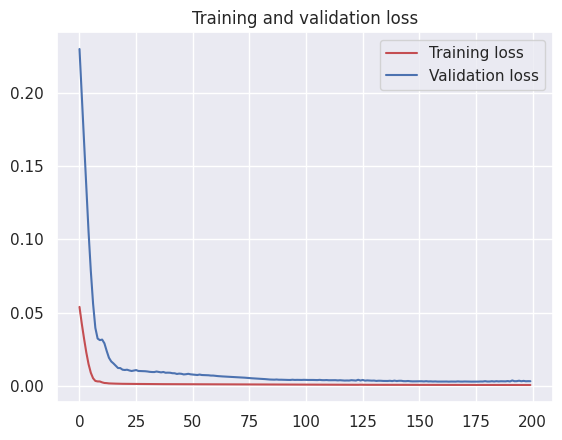

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()
#Потери при обучение в сравнении с потерями при проверке

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 2ms/step


((202, 1), (130, 1))

# Оценка модели

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  7.791776159209472
Train data MSE:  60.711775715225116
Train data MAE:  5.516239174683826
-------------------------------------------------------------------------------------
Test data RMSE:  16.579855562796467
Test data MSE:  274.891610483193
Test data MAE:  10.059790602185998


In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8822300092742054
Test data explained variance regression score: 0.9558576788492282


In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0009618030313950421
Test data MGD:  0.002056918528315001
----------------------------------------------------------------------
Train data MPD:  0.24077541461863664
Test data MPD:  0.7410860011086312


# **Сравнение первоначальной цены закрытия акций и прогнозируемой цены закрытия**

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (364, 1)
Test predicted data:  (364, 1)


# Новый раздел